Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [11]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [12]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [13]:
df.Loan_Amount_Term.nunique()

10

In [14]:
# fill null values
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
df["Dependents"] = df["Dependents"].replace('3+',int(3))
df["Dependents"] = df["Dependents"].replace('1',int(1))
df["Dependents"] = df["Dependents"].replace('2',int(2))
df["Dependents"] = df["Dependents"].replace('0',int(0))

In [19]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

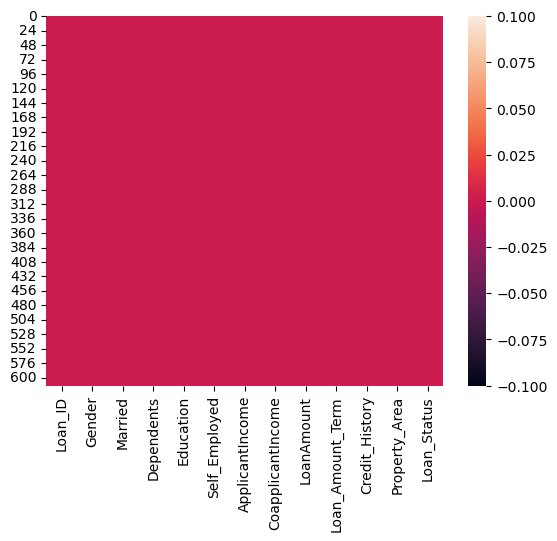

In [20]:
sns.heatmap(df.isnull())

# visualisation

<Figure size 800x800 with 0 Axes>

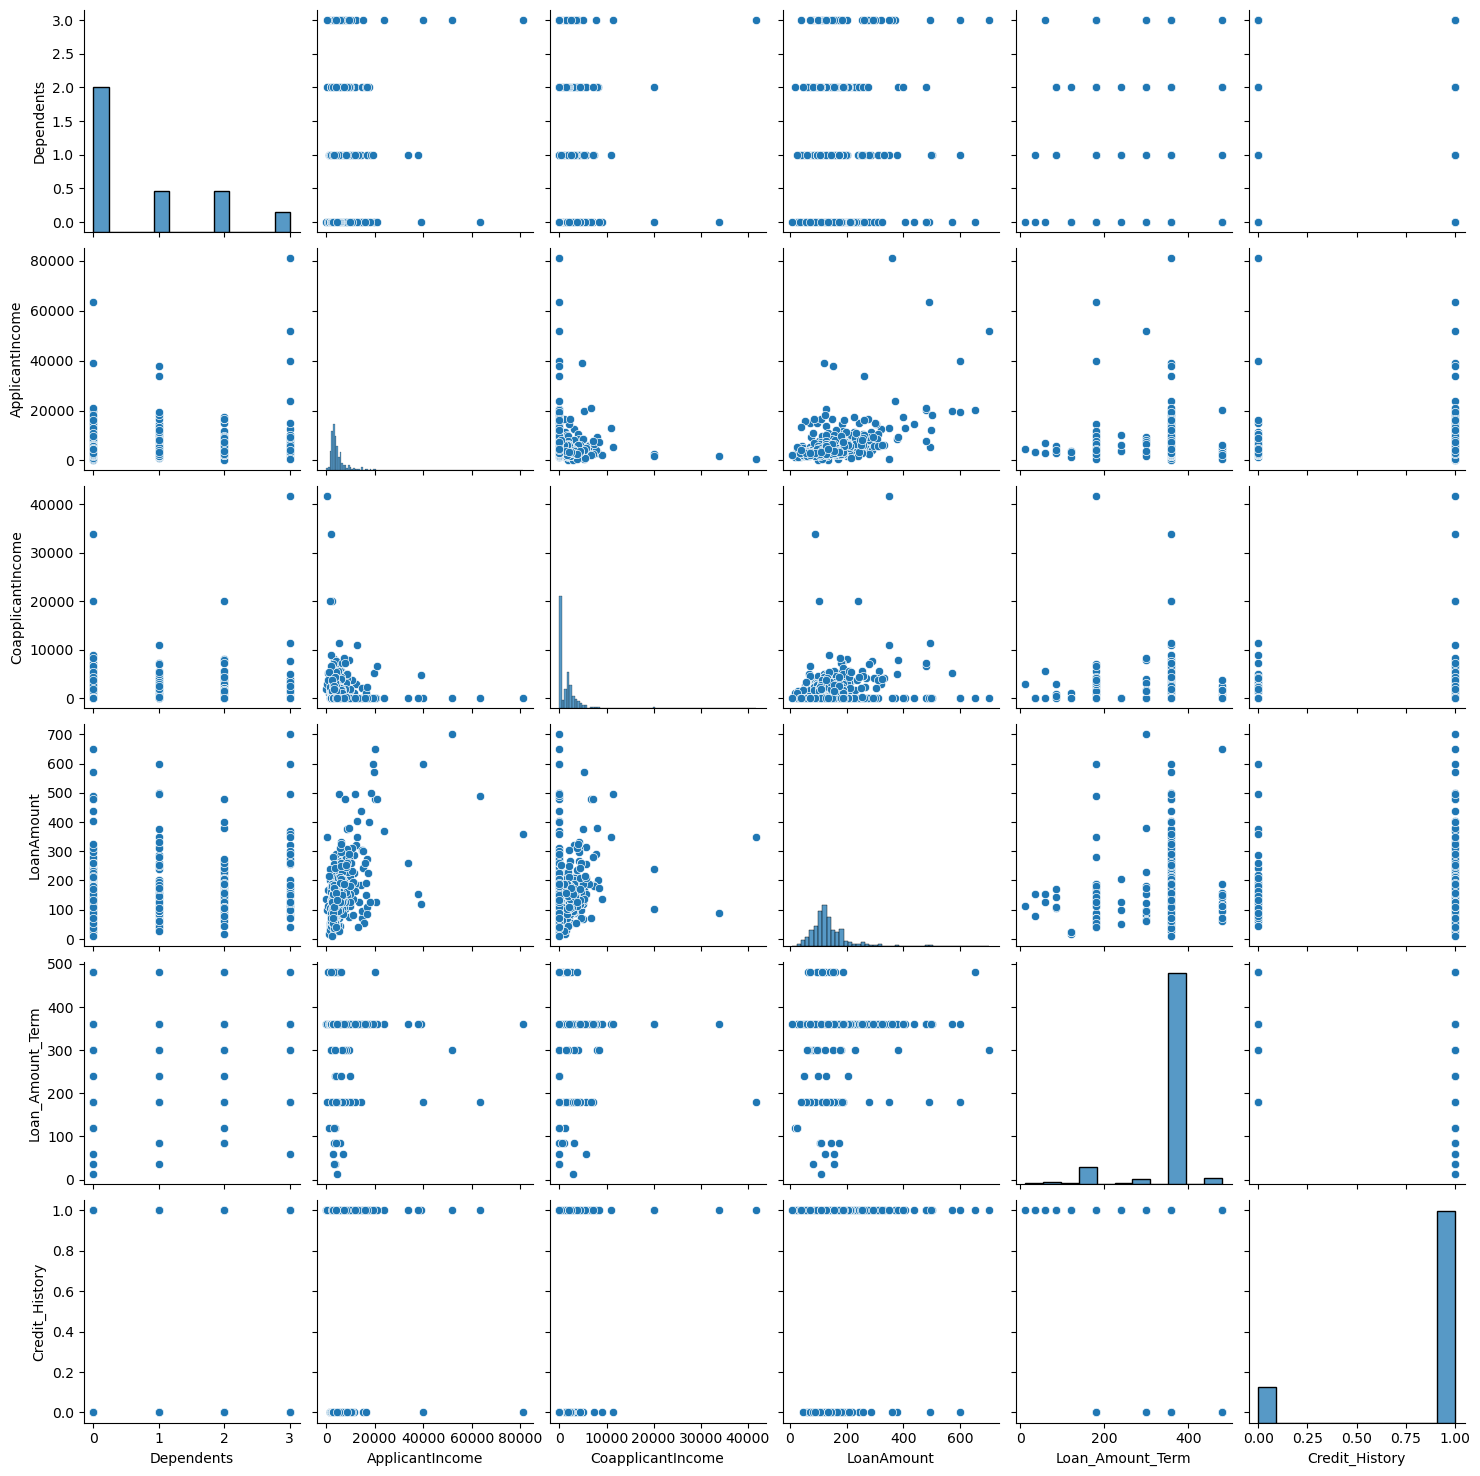

In [21]:
plt.figure(figsize=(8,8))
sns.pairplot(df)
plt.show()

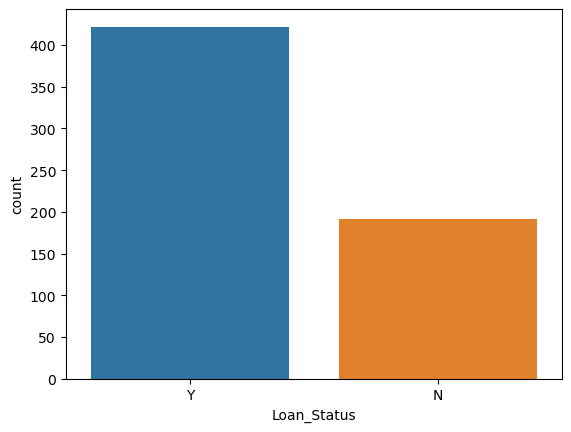

In [22]:
sns.countplot(data=df, x='Loan_Status')
plt.show()

maximum members are yes

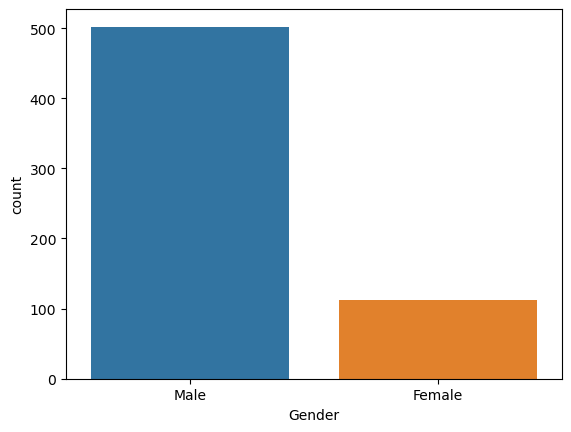

In [23]:
sns.countplot(data=df, x='Gender')
plt.show()

max members are male

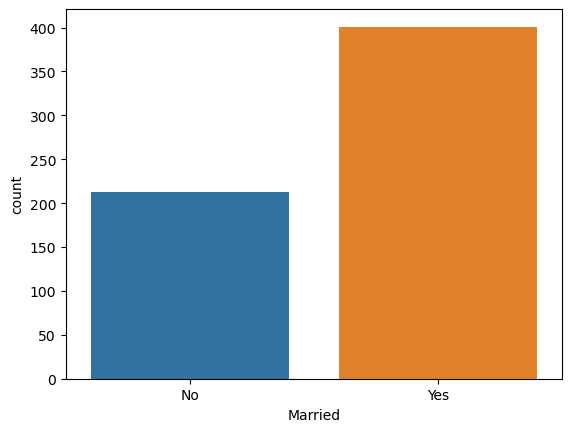

In [24]:
sns.countplot(data=df, x='Married')
plt.show()

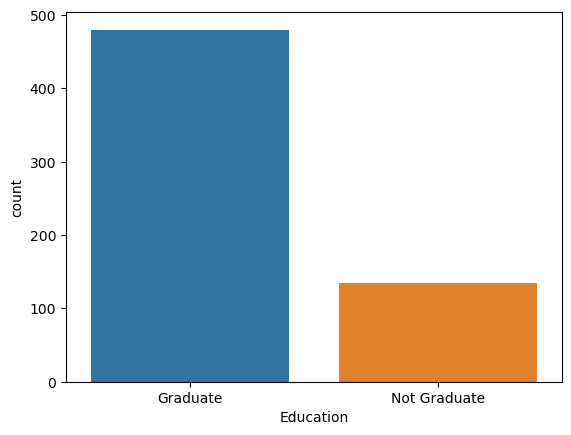

In [25]:
sns.countplot(data=df, x='Education')
plt.show()

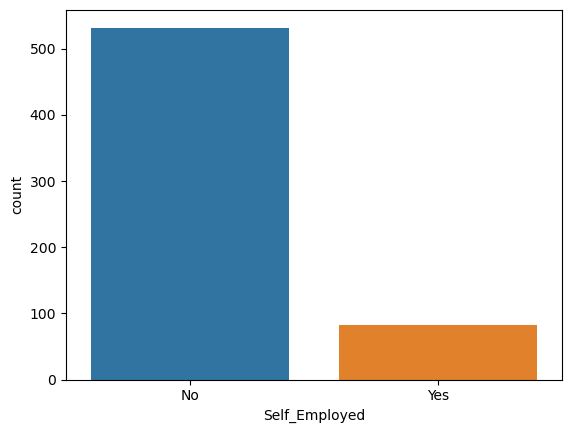

In [26]:
sns.countplot(data=df, x='Self_Employed')
plt.show()

max members are no self employed

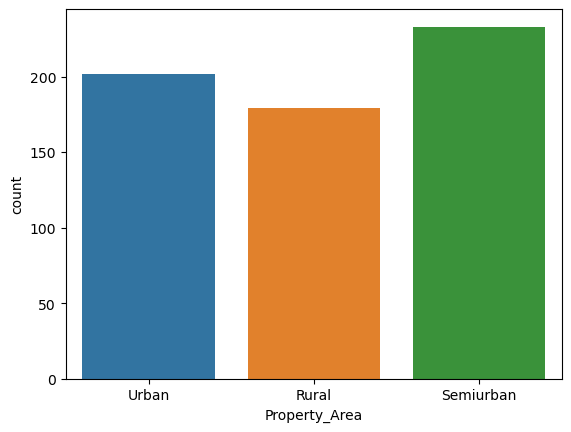

In [27]:
sns.countplot(data=df, x='Property_Area')
plt.show()

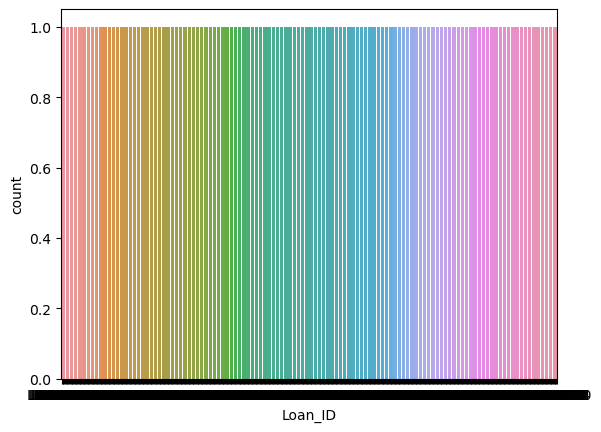

In [28]:
sns.countplot(data=df, x='Loan_ID')
plt.show()

In [29]:
#Converting the target variables into 0s and 1s
df['Loan_Status'].replace('no', 0,inplace=True)
df['Loan_Status'].replace('yes', 1,inplace=True)

In [30]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [31]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,-0.040160
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000


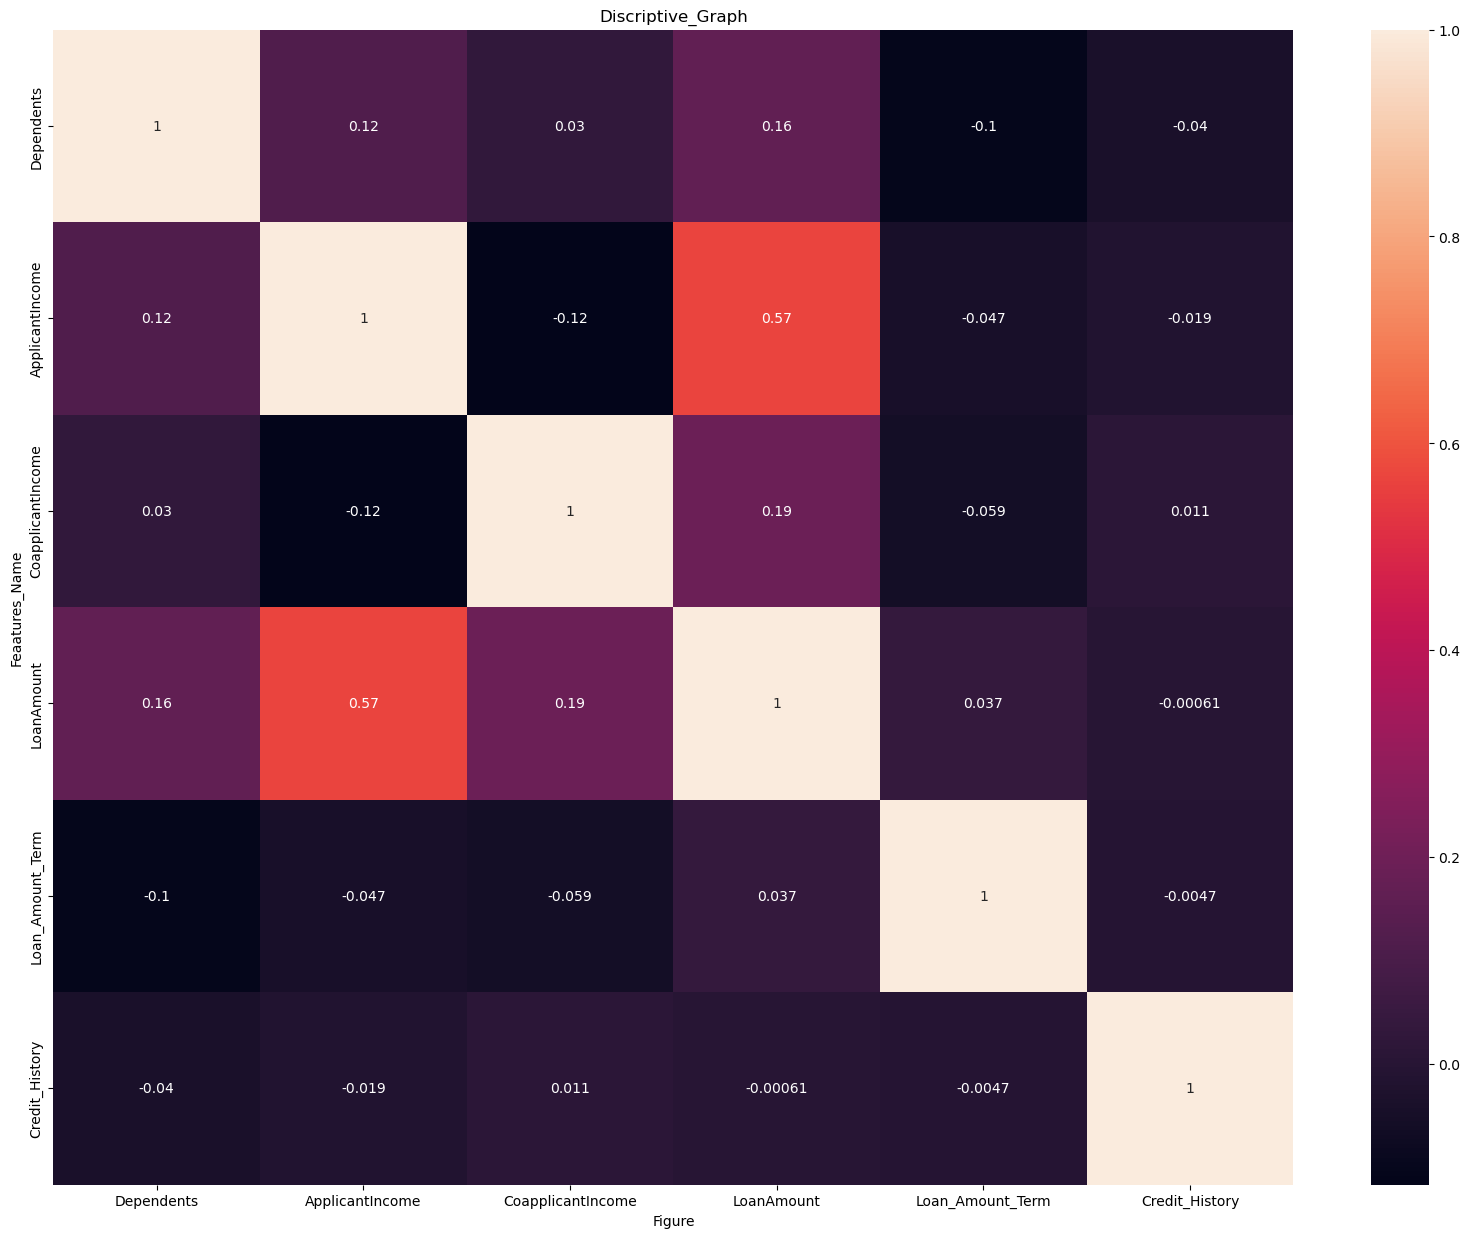

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.xlabel('Figure')
plt.ylabel('Feaatures_Name')
plt.title('Discriptive_Graph')
plt.show()

In [33]:
df.skew()

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

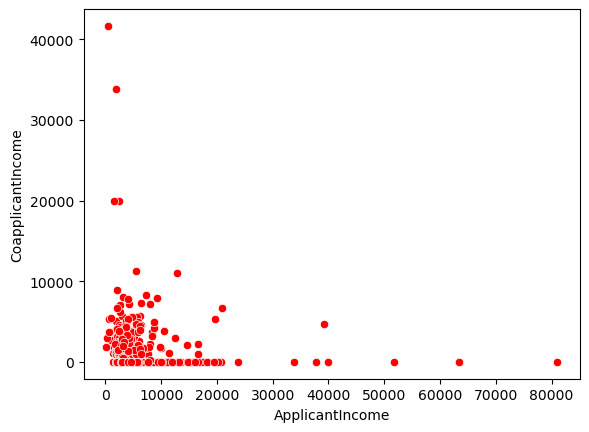

In [34]:
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome", data=df, color="red")

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

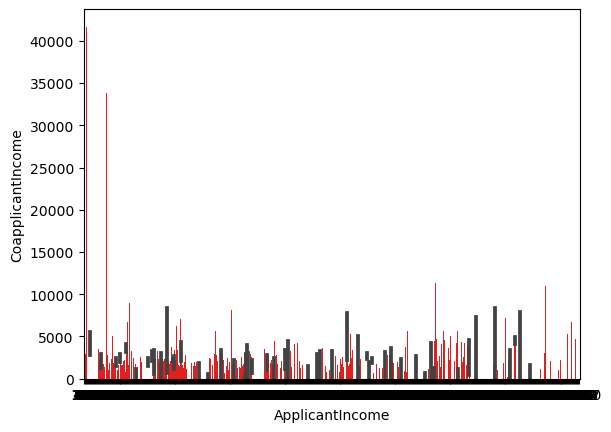

In [35]:
sns.barplot(x="ApplicantIncome", y="CoapplicantIncome", data=df, color="red")

In [36]:
print("ApplicantIncome: ",np.mean(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(df["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(df["LoanAmount"]))

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267


In [37]:
print("ApplicantIncome: ",np.median(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(df["CoapplicantIncome"]))
print("LoanAmount: ",np.median(df["LoanAmount"]))

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

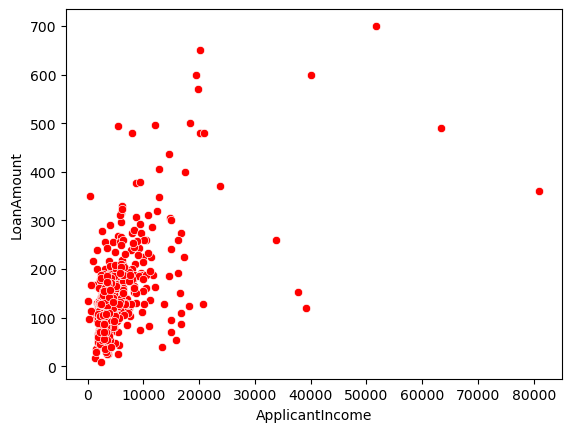

In [38]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df, color="red")

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

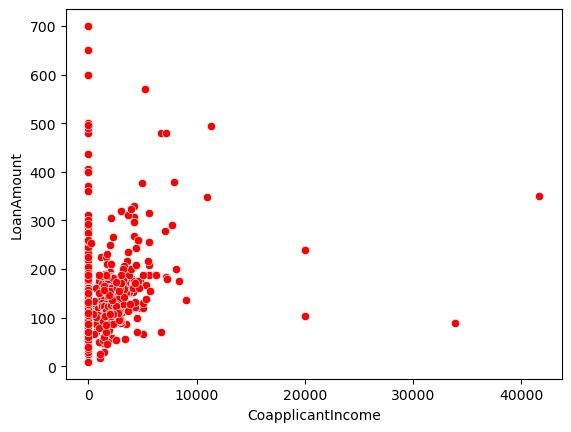

In [39]:
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", data=df, color="red")

<Axes: xlabel='CoapplicantIncome', ylabel='Dependents'>

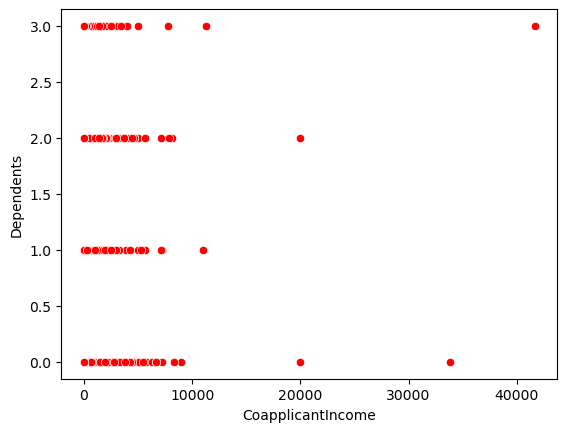

In [40]:
sns.scatterplot(x="CoapplicantIncome", y="Dependents", data=df, color="red")

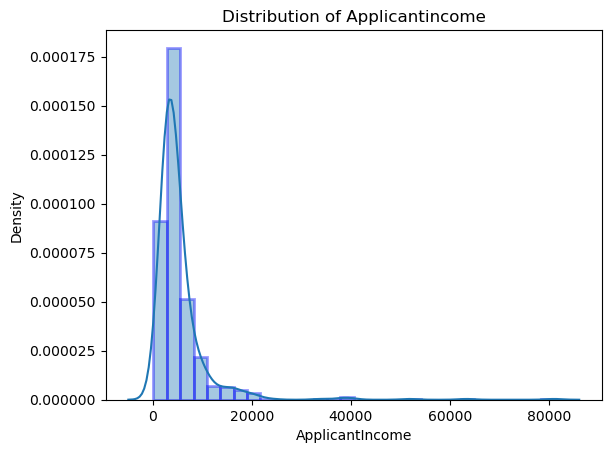

In [41]:
plt.figure()
sns.distplot(df['ApplicantIncome'], bins=30, hist_kws=dict(edgecolor='blue', linewidth=2))
plt.title('Distribution of Applicantincome')
plt.xlabel('ApplicantIncome')
plt.show()

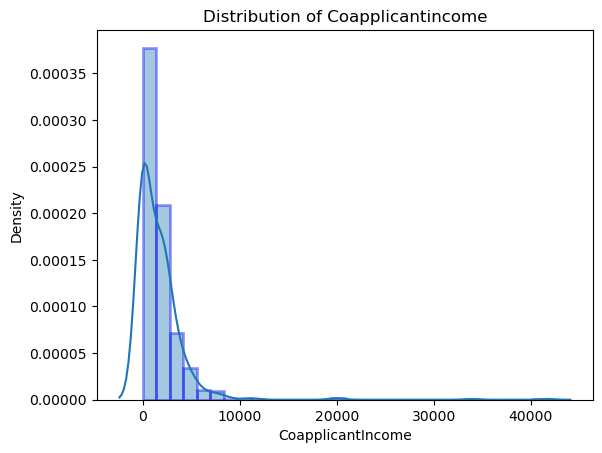

In [42]:
plt.figure()
sns.distplot(df['CoapplicantIncome'], bins=30, hist_kws=dict(edgecolor='blue', linewidth=2))
plt.title('Distribution of Coapplicantincome')
plt.xlabel('CoapplicantIncome')
plt.show()

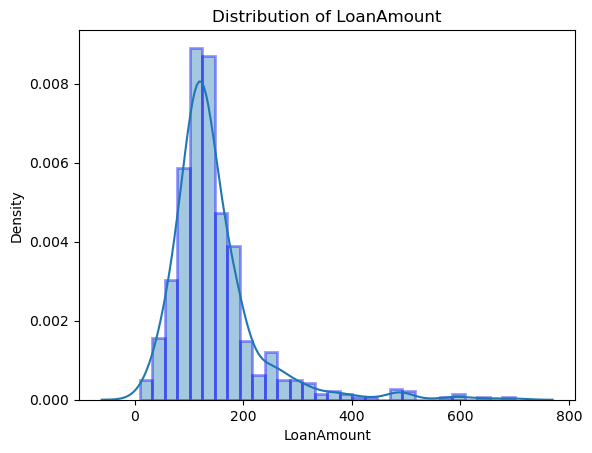

In [43]:
plt.figure()
sns.distplot(df['LoanAmount'], bins=30, hist_kws=dict(edgecolor='blue', linewidth=2))
plt.title('Distribution of LoanAmount')
plt.xlabel('LoanAmount')
plt.show()

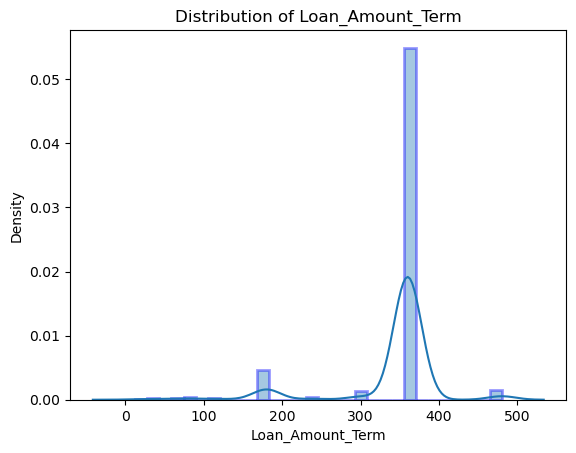

In [44]:
plt.figure()
sns.distplot(df['Loan_Amount_Term'], bins=30, hist_kws=dict(edgecolor='blue', linewidth=2))
plt.title('Distribution of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.show()

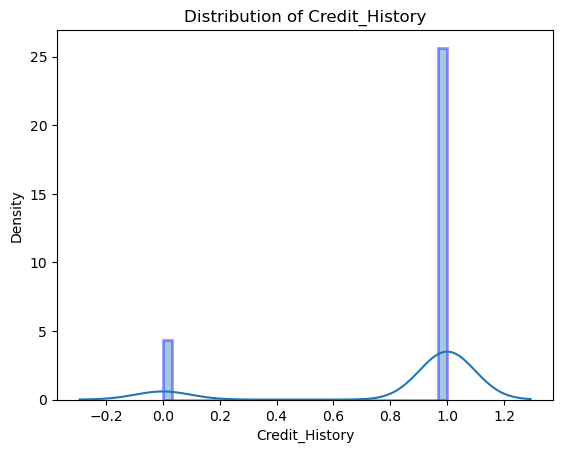

In [45]:
plt.figure()
sns.distplot(df['Credit_History'], bins=30, hist_kws=dict(edgecolor='blue', linewidth=2))
plt.title('Distribution of Credit_History')
plt.xlabel('Credit_History')
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])


In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# feature scaling

In [50]:
X = df.drop(["Loan_Status","Loan_ID"],axis=1)
Y = df["Loan_Status"]

In [51]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.889500,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.276168,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.490816,0.273231,0.411733,1.223298


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [55]:
maxAccu=0
maxRS=0 
for i in range(1,150):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(X_train,Y_train)
    pred=RFR.predict(X_test)
    acc=accuracy_score(Y_test,pred) 
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is-",maxAccu,"at randomstate is -",maxRS)

Best accuracy is- 0.8699186991869918 at randomstate is - 8


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxRS)

In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [58]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
predRFC=RFC.predict( X_test)
print(accuracy_score(Y_test,predRFC))
print(confusion_matrix(Y_test,predRFC))
print(classification_report(Y_test,predRFC))

0.8617886178861789
[[20 13]
 [ 4 86]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.70        33
           1       0.87      0.96      0.91        90

    accuracy                           0.86       123
   macro avg       0.85      0.78      0.81       123
weighted avg       0.86      0.86      0.85       123



In [59]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict( X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.8861788617886179
[[19 14]
 [ 0 90]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



In [60]:
svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict( X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.8861788617886179
[[19 14]
 [ 0 90]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



In [61]:
GB=GradientBoostingClassifier()
GB.fit(X_train,Y_train)
predGB=GB.predict( X_test)
print(accuracy_score(Y_test,predGB))
print(confusion_matrix(Y_test,predGB))
print(classification_report(Y_test,predGB))

0.8699186991869918
[[22 11]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.89      0.94      0.91        90

    accuracy                           0.87       123
   macro avg       0.85      0.81      0.82       123
weighted avg       0.87      0.87      0.87       123



In [62]:
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
predabc=abc.predict( X_test)
print(accuracy_score(Y_test,predabc))
print(confusion_matrix(Y_test,predabc))
print(classification_report(Y_test,predabc))

0.8780487804878049
[[19 14]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72        33
           1       0.86      0.99      0.92        90

    accuracy                           0.88       123
   macro avg       0.91      0.78      0.82       123
weighted avg       0.89      0.88      0.87       123



In [63]:
bc=BaggingClassifier()
bc.fit(X_train,Y_train)
predbc=bc.predict( X_test)
print(accuracy_score(Y_test,predbc))
print(confusion_matrix(Y_test,predbc))
print(classification_report(Y_test,predbc))

0.7642276422764228
[[21 12]
 [17 73]]
              precision    recall  f1-score   support

           0       0.55      0.64      0.59        33
           1       0.86      0.81      0.83        90

    accuracy                           0.76       123
   macro avg       0.71      0.72      0.71       123
weighted avg       0.78      0.76      0.77       123



In [64]:
et=ExtraTreesClassifier()
et.fit(X_train,Y_train)
predet=et.predict( X_test)
print(accuracy_score(Y_test,predet))
print(confusion_matrix(Y_test,predet))
print(classification_report(Y_test,predet))

0.8536585365853658
[[20 13]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69        33
           1       0.87      0.94      0.90        90

    accuracy                           0.85       123
   macro avg       0.83      0.78      0.80       123
weighted avg       0.85      0.85      0.85       123



In [65]:
score=cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predRFC)-score.mean())

[0.7804878  0.75609756 0.77235772 0.84552846 0.78688525]
0.7882713581234173
Differences between Acuracy and cv score is- 0.07351725976276158


In [66]:
score=cross_val_score(LR,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predLR)-score.mean())

[0.81300813 0.77235772 0.7804878  0.84552846 0.81147541]
0.8045715047314408
Differences between Acuracy and cv score is- 0.08160735705717714


In [67]:
#checking cv for SVC
score=cross_val_score(svc,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predsvc)-score.mean())

[0.81300813 0.7804878  0.7804878  0.82926829 0.81147541]
0.8029454884712781
Differences between Acuracy and cv score is- 0.08323337331733982


In [68]:
#checking cv for GradientBoostingClassifier
score=cross_val_score(GB,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predGB)-score.mean())

[0.7804878  0.70731707 0.77235772 0.83739837 0.78688525]
0.7768892443022791
Differences between Acuracy and cv score is- 0.0930294548847127


In [69]:
#checking cv for AdaBoostClassifier
score=cross_val_score(abc,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predabc)-score.mean())

[0.78861789 0.76422764 0.78861789 0.82113821 0.76229508]
0.7849793415966946
Differences between Acuracy and cv score is- 0.0930694388911103


In [70]:
#checking cv for BaggingClassifier
score=cross_val_score(bc,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predbc)-score.mean())

[0.74796748 0.69105691 0.79674797 0.82113821 0.7295082 ]
0.7572837531654006
Differences between Acuracy and cv score is- 0.006943889111022172


In [71]:
#checking cv for ExtraTreeClassifier
score=cross_val_score(et,X,Y)
print(score)
print(score.mean())
print("Differences between Acuracy and cv score is-",accuracy_score(Y_test,predet)-score.mean())

[0.76422764 0.75609756 0.76422764 0.7398374  0.73770492]
0.7524190323870452
Differences between Acuracy and cv score is- 0.10123950419832062


BaggingClassifier is our best model as the differences between accuracy and cv score is least

BaggingClassifier is our Best Model

# Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters={'estimator':[None], 
            'n_estimators':[10], 
            'max_samples':[1.0], 
            'max_features':[1.0],
            'bootstrap':[True], 
            'bootstrap_features':[False], 
            'oob_score':[False], 
            'warm_start':[False], 
            'n_jobs':[None], 
            'random_state':[None], 
            'verbose':[0]}

In [74]:
GCV=GridSearchCV( BaggingClassifier(),parameters,cv=5)

In [75]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True], 'bootstrap_features': [False],
                         'estimator': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'n_estimators': [10],
                         'n_jobs': [None], 'oob_score': [False],
                         'random_state': [None], 'verbose': [0],
                         'warm_start': [False]})

In [76]:
GCV.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
Final_model=BaggingClassifier(bootstrap=True,
 bootstrap_features=False,
 estimator=None,
 max_features=1.0,
 max_samples=1.0,
 n_estimators= 10,
 n_jobs=None,
 oob_score=False,
 random_state=None,
 verbose=0,
 warm_start=False)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

80.48780487804879


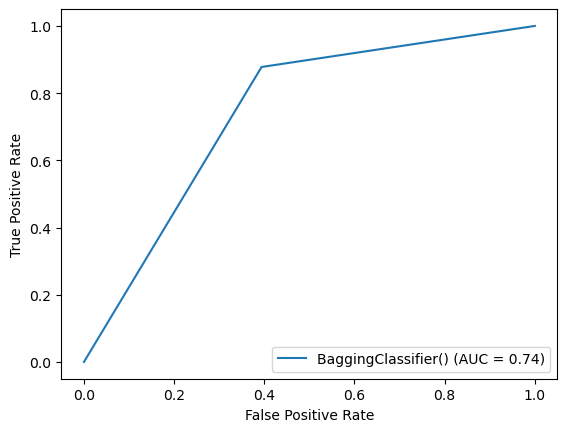

In [78]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

# Saved the model

In [79]:
import joblib
joblib.dump(Final_model,"Loan Prediction")


['Loan Prediction']

# Predicting the saved model

In [80]:
model=joblib.load("Loan Prediction")
prediction=model.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [81]:
x=np.array(Y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=x
df

,predicted,original
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
118,1,1
119,1,1
120,0,1
121,1,1


# Finally I am saving my best classification model using the joblib library.
